# Projet 9: Produisez une étude de marché avec R ou Python

## Objectifs de la présentation 

## Mission 1: Proposer une première analyse des groupements de pays que l’on peut cibler pour exporter des poulets.
### 1. La préparation, le nettoyage et l’analyse exploratoire des données. 
### 2. Tester la classification ascendante hiérarchique, avec un dendrogramme comme visualisation.
### 3. Utiliser la méthode des K-Means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering, analyser les centroïdes des classes.

## Mission 2: Approfondir l'étude de marché. 
### 1. Réaliser une ACP afin de visualiser les résultats d'analyse, 
### 2. Comprendre les groupes, les liens entre les variables, les liens entre les individus.

## Mission 1: Proposer une première analyse des groupements de pays que l’on peut cibler pour exporter des poulets.

In [1]:
#Importer des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
import statsmodels.api as sm
from statsmodels.formula.api import ols

## 1. Pré-traitement des données 
### La preparation, le nettoyage et l’analyse exploratoire des données)

In [2]:
pd.set_option("display.max_columns",None)
pd.DataFrame.iteritems = pd.DataFrame.items

In [3]:
#Importer des fichier CSV
DisponibiliteAlimentaire_2017 = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
Population_2000_2018 = pd.read_csv("Population_2000_2018.csv")

In [4]:
#Afficher les 5 premières lignes du data frame pour vérifier que les données sont bien chargées.
DisponibiliteAlimentaire_2017.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [5]:
#Afficher les 5 dernières lignes du data frame pour vérifier que les données sont bien chargées.
DisponibiliteAlimentaire_2017.tail(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée
176599,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,684,Disponibilité de matière grasse en quantité (g...,2899,Miscellanees,2017,2017,g/personne/jour,0.02,Fc,Donnée calculée


In [6]:
#Vérifier des nombres des valeurs manquantes dans chaque colonne
DisponibiliteAlimentaire_2017.isna().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

In [7]:
#Déterminer les types de données
DisponibiliteAlimentaire_2017.dtypes

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
dtype: object

In [8]:
#Vérifier les types de données dans les colonnes et compter des valeurs non manquantes
DisponibiliteAlimentaire_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [9]:
#Déterminer combien des lignes et des colonnes sont contenues dans le fichier
DisponibiliteAlimentaire_2017.shape

(176600, 14)

In [10]:
#Vérifier des doublons dans la colonne 'code domaine'
DisponibiliteAlimentaire_2017["Code Domaine"].duplicated().sum()

176599

In [11]:
#Vérifier des doublons dans la colonne 'Domaine'
DisponibiliteAlimentaire_2017["Domaine"].duplicated().sum()

176599

In [12]:
#Vérifier des doublons dans la colonne 'Code zone'
DisponibiliteAlimentaire_2017["Code zone"].duplicated().sum()

176426

In [13]:
#Vérifier des doublons dans la colonne 'Zone'
DisponibiliteAlimentaire_2017["Zone"].duplicated().sum()

176426

In [14]:
#Compter des nombres de valeurs différentes dans le dataframe 'DisponibiliteAlimentaire_2017'
DisponibiliteAlimentaire_2017.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  174
Zone                       174
Code Élément                17
Élément                     17
Code Produit                98
Produit                     98
Code année                   1
Année                        1
Unité                        4
Valeur                    7250
Symbole                      2
Description du Symbole       2
dtype: int64

In [15]:
#Lister des valeurs différentes au sein de colonne 'Produit'
DisponibiliteAlimentaire_2017["Produit"].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [16]:
#Lister des valeurs différentes au sein de colonne 'Unité'
DisponibiliteAlimentaire_2017["Unité"].unique()

array(['Milliers de tonnes', 'kg', 'Kcal/personne/jour',
       'g/personne/jour'], dtype=object)

In [17]:
#Lister des valeurs différentes au sein de colonne 'Élément'
DisponibiliteAlimentaire_2017["Élément"].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [18]:
#Déterminer combien des lignes et des colonnes sont contenues dans le fichier
DisponibiliteAlimentaire_2017.shape

(176600, 14)

In [19]:
#Remplacer NaN avec 0
DisponibiliteAlimentaire_2017.fillna(0,inplace=True)

In [20]:
#Faire des statistiques 
DisponibiliteAlimentaire_2017.describe(include="all")

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
count,176600,176600,176600.000000,176600,176600.000000,176600,176600.000000,176600,176600.0,176600.0,176600,176600.000000,176600,176600
unique,1,1,NaN,174,NaN,17,NaN,98,NaN,NaN,4,NaN,2,2
top,FBS,Nouveaux Bilans Alimentaire,NaN,Tchad,NaN,Disponibilité intérieure,NaN,Maïs et produits,NaN,NaN,Milliers de tonnes,NaN,S,Données standardisées
freq,176600,176600,NaN,1416,NaN,15905,NaN,2593,NaN,NaN,118487,NaN,118487,118487
mean,NaN,NaN,125.474740,NaN,3810.052894,NaN,2628.778545,NaN,2017.0,2017.0,NaN,210.554918,NaN,NaN
std,NaN,NaN,72.941699,NaN,2211.790089,NaN,91.993247,NaN,0.0,0.0,NaN,4762.047787,NaN,NaN
min,NaN,NaN,1.000000,NaN,645.000000,NaN,2511.000000,NaN,2017.0,2017.0,NaN,-10388.000000,NaN,NaN
25%,NaN,NaN,63.000000,NaN,684.000000,NaN,2556.000000,NaN,2017.0,2017.0,NaN,0.000000,NaN,NaN
50%,NaN,NaN,120.000000,NaN,5142.000000,NaN,2612.000000,NaN,2017.0,2017.0,NaN,0.120000,NaN,NaN
75%,NaN,NaN,188.000000,NaN,5301.000000,NaN,2732.000000,NaN,2017.0,2017.0,NaN,8.462500,NaN,NaN


In [21]:
#Sélectionner des produits 'Viande de Volailles'
options=['Viande de Volailles','Oeufs']
produit_volaille2017 =DisponibiliteAlimentaire_2017[DisponibiliteAlimentaire_2017['Produit'].isin(options)]
produit_volaille2017

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.00,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.00,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.00,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176480,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2744,Oeufs,2017,2017,Milliers de tonnes,26.00,S,Données standardisées
176481,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2744,Oeufs,2017,2017,kg,1.81,Fc,Donnée calculée
176482,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2744,Oeufs,2017,2017,Kcal/personne/jour,6.00,Fc,Donnée calculée
176483,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2744,Oeufs,2017,2017,g/personne/jour,0.52,Fc,Donnée calculée


In [22]:
#Filtrer de 'Viande de Volailles' pour tous pays
produit_volaille2017=DisponibiliteAlimentaire_2017.loc[DisponibiliteAlimentaire_2017["Produit"]=="Viande de Volailles",:]
produit_volaille2017

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.00,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.00,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.00,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176396,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2734,Viande de Volailles,2017,2017,Milliers de tonnes,67.00,S,Données standardisées
176397,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2734,Viande de Volailles,2017,2017,kg,4.68,Fc,Donnée calculée
176398,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2017,2017,Kcal/personne/jour,16.00,Fc,Donnée calculée
176399,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,2017,g/personne/jour,1.59,Fc,Donnée calculée


In [23]:
#Sélectionner des lignes choisies
options=['Production','Importations - Quantité', 'Variation de stock','Exportations - Quantité', 'Disponibilité intérieure','Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture','Alimentation pour touristes','Disponibilité de protéines en quantité (g/personne/jour)','Traitement', 'Autres utilisations (non alimentaire)']
produit_volaille2017=produit_volaille2017[produit_volaille2017['Élément'].isin(options)]
produit_volaille2017.head(10)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.00,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.00,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.00,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.00,S,Données standardisées
656,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5170,Résidus,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
657,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5142,Nourriture,2734,Viande de Volailles,2017,2017,Milliers de tonnes,55.00,S,Données standardisées
660,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,2017,g/personne/jour,0.54,Fc,Donnée calculée
1704,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,1667.00,S,Données standardisées
1705,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,514.00,S,Données standardisées


In [24]:
#Compter le nombre des 'élément' différentes
produit_volaille2017['Élément'].nunique()

14

In [25]:
#Lister les noms des 'élément' différentes
produit_volaille2017['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Disponibilité intérieure', 'Pertes', 'Résidus', 'Nourriture',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Exportations - Quantité', 'Alimentation pour touristes',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Aliments pour animaux', 'Semences'], dtype=object)

In [26]:
#vérifier des nombres des valeurs manquantes dans le dataframe 'produit_volaille2017'
produit_volaille2017.isna().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

In [27]:
#Vérifier des valeurs manquantes dans la colonne 'élément'
produit_volaille2017["Élément"].isna().sum()

0

In [28]:
#Vérifier des nombres des valeurs dupliquées dans la colonne 'élément'
produit_volaille2017["Élément"].duplicated().sum()

1531

In [29]:
#Afficher des données dans le dataframe 'produit_volaille2017'
produit_volaille2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.0,S,Données standardisées


In [30]:
#Enlever des quelques colonnes
produit_volaille2017.drop(['Code Domaine','Domaine','Code Élément','Code Produit','Produit','Code année','Année','Symbole','Description du Symbole'],axis=1,inplace=True)

/var/folders/ff/46z7kp5x47l47x9jhyp0dd940000gn/T/ipykernel_19015/1685060150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produit_volaille2017.drop(['Code Domaine','Domaine','Code Élément','Code Produit','Produit','Code année','Année','Symbole','Description du Symbole'],axis=1,inplace=True)


In [31]:
#Afficher des colonnes qui restent
produit_volaille2017.head()

,Code zone,Zone,Élément,Unité,Valeur
651,2,Afghanistan,Production,Milliers de tonnes,28.0
652,2,Afghanistan,Importations - Quantité,Milliers de tonnes,29.0
653,2,Afghanistan,Variation de stock,Milliers de tonnes,0.0
654,2,Afghanistan,Disponibilité intérieure,Milliers de tonnes,57.0
655,2,Afghanistan,Pertes,Milliers de tonnes,2.0


In [32]:
#Sélectionner des lignes et convertir de tonnes aux kilograms
produit_volaille2017.loc[produit_volaille2017['Unité'].eq('Milliers de tonnes'), 'Valeur'] *= 1000000
produit_volaille2017

,Code zone,Zone,Élément,Unité,Valeur
651,2,Afghanistan,Production,Milliers de tonnes,28000000.00
652,2,Afghanistan,Importations - Quantité,Milliers de tonnes,29000000.00
653,2,Afghanistan,Variation de stock,Milliers de tonnes,0.00
654,2,Afghanistan,Disponibilité intérieure,Milliers de tonnes,57000000.00
655,2,Afghanistan,Pertes,Milliers de tonnes,2000000.00
...,...,...,...,...,...
176393,181,Zimbabwe,Traitement,Milliers de tonnes,6000000.00
176394,181,Zimbabwe,Alimentation pour touristes,Milliers de tonnes,0.00
176395,181,Zimbabwe,Résidus,Milliers de tonnes,0.00
176396,181,Zimbabwe,Nourriture,Milliers de tonnes,67000000.00


In [33]:
#Pivoter le dataframe pour avoir des lignes comme des colonnes
df_produit_volaille2017=produit_volaille2017.pivot_table(index='Zone', columns='Élément',values='Valeur').reset_index()
df_produit_volaille2017

Élément,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,0.54,5.700000e+07,NaN,29000000.0,5.500000e+07,2000000.0,2.800000e+07,0.0,NaN,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,14.11,2.118000e+09,6.300000e+07,514000000.0,2.035000e+09,83000000.0,1.667000e+09,0.0,NaN,NaN,0.0
2,Albanie,NaN,NaN,NaN,6.26,4.700000e+07,0.000000e+00,38000000.0,4.700000e+07,NaN,1.300000e+07,0.0,NaN,NaN,4000000.0
3,Algérie,0.0,NaN,NaN,1.97,2.770000e+08,0.000000e+00,2000000.0,2.640000e+08,13000000.0,2.750000e+08,0.0,NaN,NaN,0.0
4,Allemagne,NaN,NaN,NaN,7.96,1.739000e+09,6.460000e+08,842000000.0,1.609000e+09,NaN,1.514000e+09,-38000000.0,NaN,167000000.0,-29000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,NaN,NaN,NaN,14.80,4.120000e+08,9.400000e+07,433000000.0,4.120000e+08,NaN,4.800000e+07,0.0,NaN,NaN,-26000000.0
168,Équateur,0.0,NaN,NaN,6.15,3.410000e+08,0.000000e+00,0.0,3.240000e+08,17000000.0,3.400000e+08,0.0,NaN,NaN,-1000000.0
169,États-Unis d'Amérique,NaN,NaN,89000000.0,19.93,1.826600e+10,3.692000e+09,123000000.0,1.810000e+10,NaN,2.191400e+10,0.0,NaN,77000000.0,80000000.0
170,Éthiopie,0.0,NaN,NaN,0.04,1.400000e+07,NaN,1000000.0,1.400000e+07,1000000.0,1.400000e+07,0.0,NaN,NaN,0.0


In [34]:
#Afficher les noms des colonnes 
df_produit_volaille2017.columns

Index(['Zone', 'Alimentation pour touristes', 'Aliments pour animaux',
       'Autres utilisations (non alimentaire)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock'],
      dtype='object', name='Élément')

In [35]:
#Compter des nombres des valeurs manquantes dans chaque colonne
df_produit_volaille2017.isna().sum()

Élément
Zone                                                          0
Alimentation pour touristes                                  94
Aliments pour animaux                                       171
Autres utilisations (non alimentaire)                       138
Disponibilité de protéines en quantité (g/personne/jour)      0
Disponibilité intérieure                                      2
Exportations - Quantité                                      37
Importations - Quantité                                       2
Nourriture                                                    2
Pertes                                                      105
Production                                                    4
Résidus                                                       8
Semences                                                    171
Traitement                                                  126
Variation de stock                                            3
dtype: int64

In [36]:
#Vérifier des nombres des valeurs dupliquées
df_produit_volaille2017.duplicated().sum()

0

In [37]:
#Afficher les 5 premières lignes du data frame pour vérifier que les données sont bien chargées.
Population_2000_2018.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [38]:
#Afficher les 5 dernières lignes du data frame pour vérifier que les données sont bien chargées.
Population_2000_2018.tail()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN
4410,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,14438.802,X,Sources internationales sûres,NaN


In [39]:
#Renommer les colonnes de dataframe 'Population_2000_2018'
Population_2000_2018.rename(columns={"Valeur":"Population"},inplace=True)
Population_2000_2018

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Population,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


In [40]:
#Multiplier par 1000 car la population est exprimée en milliers d'habitants
Population_2000_2018["Population"]*=1000
Population_2000_2018.drop(["Unité"],axis=1,inplace=True)
Population_2000_2018.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Population,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,20779953.0,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,21606988.0,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,22600770.0,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,23680871.0,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,24726684.0,X,Sources internationales sûres,NaN


In [41]:
#Vérifier des valeurs manquantes dans le dataframe 'Population_2000_2018'
Population_2000_2018.isna().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Population                   0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

In [42]:
#Compter des nombres de valeurs différentes dans le dataframe 'Population_2000_2018'
Population_2000_2018.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  238
Zone                       238
Code Élément                 1
Élément                      1
Code Produit                 1
Produit                      1
Code année                  19
Année                       19
Population                4398
Symbole                      2
Description du Symbole       2
Note                         1
dtype: int64

In [43]:
#Lister des valeurs différentes au sein de colonne "Zone"
Population_2000_2018["Symbole"].unique()

array(['X', 'A'], dtype=object)

In [44]:
#Déterminer combien des lignes et des colonnes sont contenues dans le fichier
Population_2000_2018.shape

(4411, 14)

In [45]:
#Lister des valeurs différentes au sein de colonne "Zone"
Population_2000_2018["Année"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [46]:
#Afficher des valeurs non manquantes dans chaque colonnes et des types
Population_2000_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Population              4411 non-null   float64
 11  Symbole                 4411 non-null   object 
 12  Description du Symbole  4411 non-null   object 
 13  Note                    258 non-null    object 
dtypes: float64(1), int64(5), object(8)
memor

In [47]:
#Faire des statistiques 
Population_2000_2018.describe(include="all")

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Population,Symbole,Description du Symbole,Note
count,4411,4411,4411.000000,4411,4411.0,4411,4411.0,4411,4411.000000,4411.000000,4.411000e+03,4411,4411,258
unique,1,1,NaN,238,NaN,1,NaN,1,NaN,NaN,NaN,2,2,1
top,OA,Séries temporelles annuelles,NaN,Afghanistan,NaN,Population totale,NaN,Population-Estimations,NaN,NaN,NaN,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
freq,4411,4411,NaN,19,NaN,4411,NaN,4411,NaN,NaN,NaN,4374,4374,258
mean,NaN,NaN,132.202902,NaN,511.0,NaN,3010.0,NaN,2009.068238,2009.068238,2.963004e+07,NaN,NaN,NaN
std,NaN,NaN,75.854840,NaN,0.0,NaN,0.0,NaN,5.481539,5.481539,1.238029e+08,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,511.0,NaN,3010.0,NaN,2000.000000,2000.000000,7.850000e+02,NaN,NaN,NaN
25%,NaN,NaN,68.000000,NaN,511.0,NaN,3010.0,NaN,2004.000000,2004.000000,3.921890e+05,NaN,NaN,NaN
50%,NaN,NaN,132.000000,NaN,511.0,NaN,3010.0,NaN,2009.000000,2009.000000,4.764741e+06,NaN,NaN,NaN
75%,NaN,NaN,195.000000,NaN,511.0,NaN,3010.0,NaN,2014.000000,2014.000000,1.821548e+07,NaN,NaN,NaN


In [48]:
#Enlever des quelques colonnes
Population_2000_2018.drop(['Code Domaine','Domaine','Code Élément','Élément','Code Produit','Produit','Code année','Symbole','Description du Symbole','Note'],axis=1,inplace=True)
Population_2000_2018

,Code zone,Zone,Année,Population
0,2,Afghanistan,2000,20779953.0
1,2,Afghanistan,2001,21606988.0
2,2,Afghanistan,2002,22600770.0
3,2,Afghanistan,2003,23680871.0
4,2,Afghanistan,2004,24726684.0
...,...,...,...,...
4406,181,Zimbabwe,2014,13586707.0
4407,181,Zimbabwe,2015,13814629.0
4408,181,Zimbabwe,2016,14030331.0
4409,181,Zimbabwe,2017,14236595.0


In [49]:
#Faire la jointure des deux dataframes
dfmerge= pd.merge(df_produit_volaille2017, Population_2000_2018[Population_2000_2018['Année']==2018], on ='Zone',how ='inner', indicator=True)
dfmerge

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,Code zone,Année,Population,_merge
0,Afghanistan,NaN,NaN,NaN,0.54,5.700000e+07,NaN,29000000.0,5.500000e+07,2000000.0,2.800000e+07,0.0,NaN,NaN,0.0,2,2018,37171921.0,both
1,Afrique du Sud,0.0,NaN,NaN,14.11,2.118000e+09,6.300000e+07,514000000.0,2.035000e+09,83000000.0,1.667000e+09,0.0,NaN,NaN,0.0,202,2018,57792518.0,both
2,Albanie,NaN,NaN,NaN,6.26,4.700000e+07,0.000000e+00,38000000.0,4.700000e+07,NaN,1.300000e+07,0.0,NaN,NaN,4000000.0,3,2018,2882740.0,both
3,Algérie,0.0,NaN,NaN,1.97,2.770000e+08,0.000000e+00,2000000.0,2.640000e+08,13000000.0,2.750000e+08,0.0,NaN,NaN,0.0,4,2018,42228408.0,both
4,Allemagne,NaN,NaN,NaN,7.96,1.739000e+09,6.460000e+08,842000000.0,1.609000e+09,NaN,1.514000e+09,-38000000.0,NaN,167000000.0,-29000000.0,79,2018,83124418.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,NaN,NaN,NaN,14.80,4.120000e+08,9.400000e+07,433000000.0,4.120000e+08,NaN,4.800000e+07,0.0,NaN,NaN,-26000000.0,225,2018,9630959.0,both
168,Équateur,0.0,NaN,NaN,6.15,3.410000e+08,0.000000e+00,0.0,3.240000e+08,17000000.0,3.400000e+08,0.0,NaN,NaN,-1000000.0,58,2018,17084358.0,both
169,États-Unis d'Amérique,NaN,NaN,89000000.0,19.93,1.826600e+10,3.692000e+09,123000000.0,1.810000e+10,NaN,2.191400e+10,0.0,NaN,77000000.0,80000000.0,231,2018,327096265.0,both
170,Éthiopie,0.0,NaN,NaN,0.04,1.400000e+07,NaN,1000000.0,1.400000e+07,1000000.0,1.400000e+07,0.0,NaN,NaN,0.0,238,2018,109224414.0,both


In [50]:
#Afficher les 5 premières lignes
dfmerge.head(5)

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,Code zone,Année,Population,_merge
0,Afghanistan,NaN,NaN,NaN,0.54,5.700000e+07,NaN,29000000.0,5.500000e+07,2000000.0,2.800000e+07,0.0,NaN,NaN,0.0,2,2018,37171921.0,both
1,Afrique du Sud,0.0,NaN,NaN,14.11,2.118000e+09,63000000.0,514000000.0,2.035000e+09,83000000.0,1.667000e+09,0.0,NaN,NaN,0.0,202,2018,57792518.0,both
2,Albanie,NaN,NaN,NaN,6.26,4.700000e+07,0.0,38000000.0,4.700000e+07,NaN,1.300000e+07,0.0,NaN,NaN,4000000.0,3,2018,2882740.0,both
3,Algérie,0.0,NaN,NaN,1.97,2.770000e+08,0.0,2000000.0,2.640000e+08,13000000.0,2.750000e+08,0.0,NaN,NaN,0.0,4,2018,42228408.0,both
4,Allemagne,NaN,NaN,NaN,7.96,1.739000e+09,646000000.0,842000000.0,1.609000e+09,NaN,1.514000e+09,-38000000.0,NaN,167000000.0,-29000000.0,79,2018,83124418.0,both


In [51]:
#Compter les lignes jointes 
dfmerge._merge.value_counts()

both          172
left_only       0
right_only      0
Name: _merge, dtype: int64

In [52]:
#Eliminer des colonnes ne pas avoir besoin
dfmerge.drop(['_merge','Code zone','Année','Traitement'],axis=1,inplace=True)
dfmerge.head()

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Variation de stock,Population
0,Afghanistan,NaN,NaN,NaN,0.54,5.700000e+07,NaN,29000000.0,5.500000e+07,2000000.0,2.800000e+07,0.0,NaN,0.0,37171921.0
1,Afrique du Sud,0.0,NaN,NaN,14.11,2.118000e+09,63000000.0,514000000.0,2.035000e+09,83000000.0,1.667000e+09,0.0,NaN,0.0,57792518.0
2,Albanie,NaN,NaN,NaN,6.26,4.700000e+07,0.0,38000000.0,4.700000e+07,NaN,1.300000e+07,0.0,NaN,4000000.0,2882740.0
3,Algérie,0.0,NaN,NaN,1.97,2.770000e+08,0.0,2000000.0,2.640000e+08,13000000.0,2.750000e+08,0.0,NaN,0.0,42228408.0
4,Allemagne,NaN,NaN,NaN,7.96,1.739000e+09,646000000.0,842000000.0,1.609000e+09,NaN,1.514000e+09,-38000000.0,NaN,-29000000.0,83124418.0


In [53]:
#Remplacer NaN avec 0
dfmerge.fillna(0,inplace=True)
dfmerge

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Variation de stock,Population
0,Afghanistan,0.0,0.0,0.0,0.54,5.700000e+07,0.000000e+00,29000000.0,5.500000e+07,2000000.0,2.800000e+07,0.0,0.0,0.0,37171921.0
1,Afrique du Sud,0.0,0.0,0.0,14.11,2.118000e+09,6.300000e+07,514000000.0,2.035000e+09,83000000.0,1.667000e+09,0.0,0.0,0.0,57792518.0
2,Albanie,0.0,0.0,0.0,6.26,4.700000e+07,0.000000e+00,38000000.0,4.700000e+07,0.0,1.300000e+07,0.0,0.0,4000000.0,2882740.0
3,Algérie,0.0,0.0,0.0,1.97,2.770000e+08,0.000000e+00,2000000.0,2.640000e+08,13000000.0,2.750000e+08,0.0,0.0,0.0,42228408.0
4,Allemagne,0.0,0.0,0.0,7.96,1.739000e+09,6.460000e+08,842000000.0,1.609000e+09,0.0,1.514000e+09,-38000000.0,0.0,-29000000.0,83124418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,0.0,0.0,0.0,14.80,4.120000e+08,9.400000e+07,433000000.0,4.120000e+08,0.0,4.800000e+07,0.0,0.0,-26000000.0,9630959.0
168,Équateur,0.0,0.0,0.0,6.15,3.410000e+08,0.000000e+00,0.0,3.240000e+08,17000000.0,3.400000e+08,0.0,0.0,-1000000.0,17084358.0
169,États-Unis d'Amérique,0.0,0.0,89000000.0,19.93,1.826600e+10,3.692000e+09,123000000.0,1.810000e+10,0.0,2.191400e+10,0.0,0.0,80000000.0,327096265.0
170,Éthiopie,0.0,0.0,0.0,0.04,1.400000e+07,0.000000e+00,1000000.0,1.400000e+07,1000000.0,1.400000e+07,0.0,0.0,0.0,109224414.0


## L’analyse exploratoire des données.

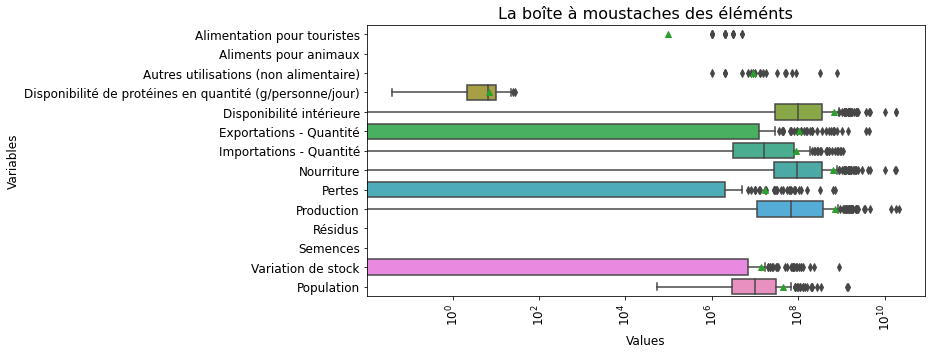

In [54]:
#Afficher des valeurs aberrantes pour les Zones
plt.rcParams.update({'font.size':12})
plt.figure(figsize=(10,5))
sns.boxplot(data=dfmerge,orient="h",showmeans=True)
plt.title("La boîte à moustaches des éléménts", fontsize=16)
plt.ylabel("Variables",loc='center')
plt.xlabel("Values")
plt.ylim()
plt.xscale('log')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [55]:
#Enlèver des colonnes qui n'ont pas représenté par des boîtes
dfmerge.drop(['Alimentation pour touristes','Aliments pour animaux','Autres utilisations (non alimentaire)','Résidus','Semences'],axis=1,inplace=True)

In [56]:
#Afficher des colonnes qui restent
dfmerge

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,Population
0,Afghanistan,0.54,5.700000e+07,0.000000e+00,29000000.0,5.500000e+07,2000000.0,2.800000e+07,0.0,37171921.0
1,Afrique du Sud,14.11,2.118000e+09,6.300000e+07,514000000.0,2.035000e+09,83000000.0,1.667000e+09,0.0,57792518.0
2,Albanie,6.26,4.700000e+07,0.000000e+00,38000000.0,4.700000e+07,0.0,1.300000e+07,4000000.0,2882740.0
3,Algérie,1.97,2.770000e+08,0.000000e+00,2000000.0,2.640000e+08,13000000.0,2.750000e+08,0.0,42228408.0
4,Allemagne,7.96,1.739000e+09,6.460000e+08,842000000.0,1.609000e+09,0.0,1.514000e+09,-29000000.0,83124418.0
...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,14.80,4.120000e+08,9.400000e+07,433000000.0,4.120000e+08,0.0,4.800000e+07,-26000000.0,9630959.0
168,Équateur,6.15,3.410000e+08,0.000000e+00,0.0,3.240000e+08,17000000.0,3.400000e+08,-1000000.0,17084358.0
169,États-Unis d'Amérique,19.93,1.826600e+10,3.692000e+09,123000000.0,1.810000e+10,0.0,2.191400e+10,80000000.0,327096265.0
170,Éthiopie,0.04,1.400000e+07,0.000000e+00,1000000.0,1.400000e+07,1000000.0,1.400000e+07,0.0,109224414.0


### La distribution des données

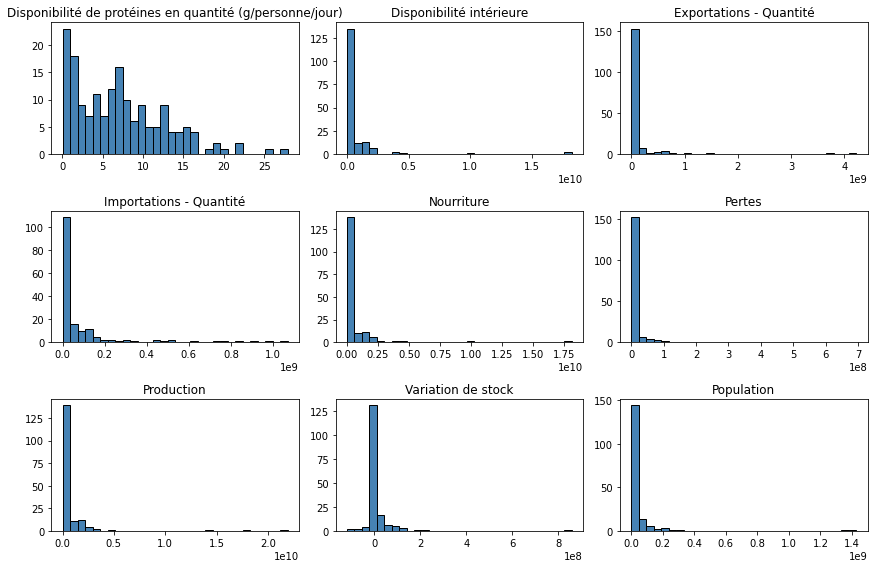

In [57]:
#Distribution des données
plt.rcParams.update({'font.size':10})
dfmerge.hist(bins=30, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=10, ylabelsize=10, grid=False)    
plt.tight_layout(rect=(2,2,4,4))
plt.show()

### Le test de normalité de Shapiro-Wilk 

In [58]:
#Faire Shapiro-Wilk test pour la variable 'production'
from scipy.stats import shapiro
shapiro(dfmerge['Production'])

ShapiroResult(statistic=0.27446264028549194, pvalue=1.2827150722424986e-25)

In [59]:
stat, p=shapiro(dfmerge['Production'])
print('statistics=%.3f, p=%.3f' %(stat,p))

statistics=0.274, p=0.000


In [60]:
#Faire Shapiro-Wilk test pour la variable 'Disponibilité intérieure'
from scipy.stats import shapiro
shapiro(dfmerge['Disponibilité intérieure'])

ShapiroResult(statistic=0.29683834314346313, pvalue=2.7096373692258585e-25)

In [61]:
stat, p=shapiro(dfmerge['Disponibilité intérieure'])
print('statistics=%.3f, p=%.3f' %(stat,p))

statistics=0.297, p=0.000


In [62]:
#Faire Shapiro-Wilk test pour la variable 'Exportations - Quantité'
shapiro(dfmerge['Exportations - Quantité'])

ShapiroResult(statistic=0.22820955514907837, pvalue=2.89025292830324e-26)

In [63]:
stat, p=shapiro(dfmerge['Exportations - Quantité'])
print('statistics=%.3f, p=%.3f' %(stat,p))

statistics=0.228, p=0.000


In [64]:
#Faire Shapiro-Wilk test pour la variable 'Importations - Quantité'
shapiro(dfmerge['Importations - Quantité'])

ShapiroResult(statistic=0.513537585735321, pvalue=1.2232975361829257e-21)

In [65]:
stat, p=shapiro(dfmerge['Importations - Quantité'])
print('statistics=%.3f, p=%.3f' %(stat,p))

statistics=0.514, p=0.000


### Des tests statistiques pour des variables



Disponibilité intérieure


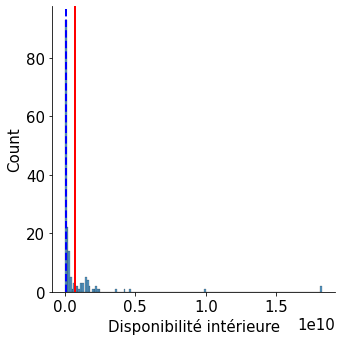

Skewness:  6.674054562242075
Kurtosis:  48.736943172428354
KstestResult(statistic=0.358, pvalue=5.551115123125783e-16) 

Exportations - quantité


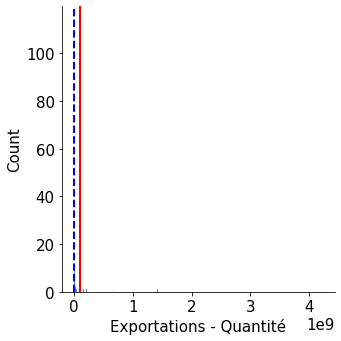

Skewness:  7.326676692983691
Kurtosis:  58.19343524536491
KstestResult(statistic=0.434, pvalue=5.551115123125783e-16) 

Importations - quantité


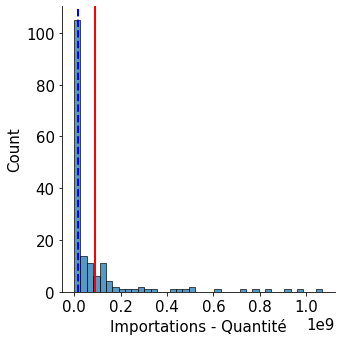

Skewness:  3.309784668548142
Kurtosis:  11.293973935965239
KstestResult(statistic=0.326, pvalue=2.4980018054066022e-14) 

Nourriture


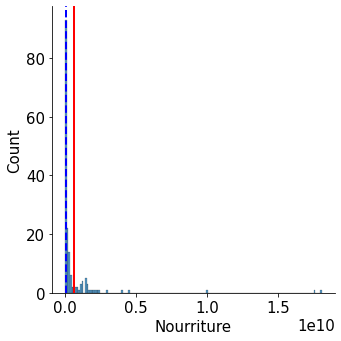

Skewness:  6.744417724474579
Kurtosis:  49.40298360172165
KstestResult(statistic=0.4, pvalue=5.551115123125783e-16) 

Pertes


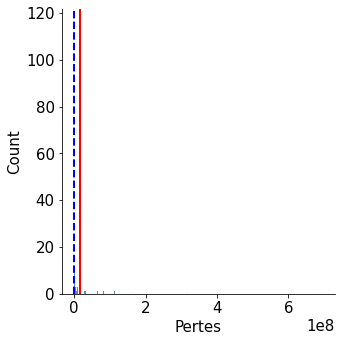

Skewness:  7.270540512851091
Kurtosis:  56.28251524090704
KstestResult(statistic=0.432, pvalue=5.551115123125783e-16) 

Production


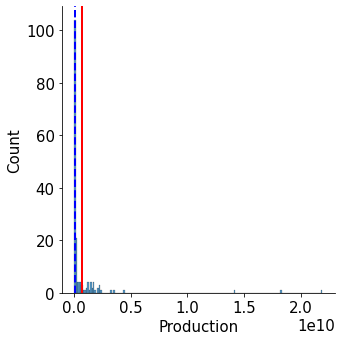

Skewness:  6.760260876609661
Kurtosis:  48.792937207295374
KstestResult(statistic=0.392, pvalue=5.551115123125783e-16) 

Population


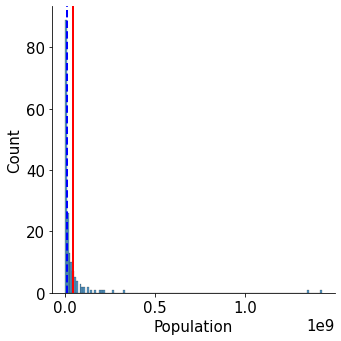

Skewness:  7.901944325945264
Kurtosis:  65.8460626480118
KstestResult(statistic=0.39, pvalue=5.551115123125783e-16) 



In [66]:
#Afficher des valeurs statistiques
import scipy as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ks_2samp

plt.rcParams.update({'font.size':15})
def distrib_normalize(i):
    print(i.capitalize())
    _ = sns.displot(dfmerge[i])
    _ = plt.axvline(x=dfmerge[i].mean(), label='Moyenne', linestyle='-', color='r', linewidth=2)
    _ = plt.axvline(x=dfmerge[i].median(), label='Médiane', linestyle='--', color='b', linewidth=2)
    _ = plt.show()
    print('Skewness: ', str(st.stats.skew(dfmerge[i])))
    print('Kurtosis: ', str(st.stats.kurtosis(dfmerge[i])))
    print((str(ks_2samp(dfmerge[i],list(np.random.normal(np.mean(dfmerge[i]), np.std(dfmerge[i]),1000))))),'\n')
    
cols = dfmerge[['Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Nourriture', 'Pertes', 'Production','Population']]
print('\n')
    
for i in cols:
    distrib_normalize(i)

In [67]:
#Déterminer des moyennes pour chaque colonne
colonne_moyenne = dfmerge.iloc[:,1:10].mean(axis=0,skipna=True)
colonne_moyenne

Disponibilité de protéines en quantité (g/personne/jour)    7.121279e+00
Disponibilité intérieure                                    6.795988e+08
Exportations - Quantité                                     1.037500e+08
Importations - Quantité                                     8.848837e+07
Nourriture                                                  6.494070e+08
Pertes                                                      1.697674e+07
Production                                                  7.083256e+08
Variation de stock                                          1.343023e+07
Population                                                  4.330265e+07
dtype: float64

In [68]:
#Sélectionner des colonnes numériques avec 'select_dtypes' fonction et déterminer des moyennes
numeric_cols = dfmerge.select_dtypes(include=[np.number]).columns
dfmerge[numeric_cols].mean()

Disponibilité de protéines en quantité (g/personne/jour)    7.121279e+00
Disponibilité intérieure                                    6.795988e+08
Exportations - Quantité                                     1.037500e+08
Importations - Quantité                                     8.848837e+07
Nourriture                                                  6.494070e+08
Pertes                                                      1.697674e+07
Production                                                  7.083256e+08
Variation de stock                                          1.343023e+07
Population                                                  4.330265e+07
dtype: float64

In [69]:
#Déterminer des écart-types
colonne_écart = dfmerge.iloc[:,1:10].std(axis=0, skipna=True)
colonne_écart

Disponibilité de protéines en quantité (g/personne/jour)    5.603464e+00
Disponibilité intérieure                                    2.175613e+09
Exportations - Quantité                                     4.580661e+08
Importations - Quantité                                     1.858246e+08
Nourriture                                                  2.125189e+09
Pertes                                                      7.802766e+07
Production                                                  2.474456e+09
Variation de stock                                          7.472242e+07
Population                                                  1.542364e+08
dtype: float64

In [70]:
#Sélectionner des colonnes numériques avec 'select_dtypes' fonction et déterminer des écart-types
numeric_cols = dfmerge.select_dtypes(include=[np.number]).columns
dfmerge[numeric_cols].std()

Disponibilité de protéines en quantité (g/personne/jour)    5.603464e+00
Disponibilité intérieure                                    2.175613e+09
Exportations - Quantité                                     4.580661e+08
Importations - Quantité                                     1.858246e+08
Nourriture                                                  2.125189e+09
Pertes                                                      7.802766e+07
Production                                                  2.474456e+09
Variation de stock                                          7.472242e+07
Population                                                  1.542364e+08
dtype: float64

In [71]:
#Afficher le dataframe 'dfmerge'
dfmerge

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,Population
0,Afghanistan,0.54,5.700000e+07,0.000000e+00,29000000.0,5.500000e+07,2000000.0,2.800000e+07,0.0,37171921.0
1,Afrique du Sud,14.11,2.118000e+09,6.300000e+07,514000000.0,2.035000e+09,83000000.0,1.667000e+09,0.0,57792518.0
2,Albanie,6.26,4.700000e+07,0.000000e+00,38000000.0,4.700000e+07,0.0,1.300000e+07,4000000.0,2882740.0
3,Algérie,1.97,2.770000e+08,0.000000e+00,2000000.0,2.640000e+08,13000000.0,2.750000e+08,0.0,42228408.0
4,Allemagne,7.96,1.739000e+09,6.460000e+08,842000000.0,1.609000e+09,0.0,1.514000e+09,-29000000.0,83124418.0
...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,14.80,4.120000e+08,9.400000e+07,433000000.0,4.120000e+08,0.0,4.800000e+07,-26000000.0,9630959.0
168,Équateur,6.15,3.410000e+08,0.000000e+00,0.0,3.240000e+08,17000000.0,3.400000e+08,-1000000.0,17084358.0
169,États-Unis d'Amérique,19.93,1.826600e+10,3.692000e+09,123000000.0,1.810000e+10,0.0,2.191400e+10,80000000.0,327096265.0
170,Éthiopie,0.04,1.400000e+07,0.000000e+00,1000000.0,1.400000e+07,1000000.0,1.400000e+07,0.0,109224414.0


### Déterminer des valeurs aberrantes (des outliers)

In [72]:
#Déterminer des valeurs aberrantes (des outliers) dans le dataframe 'dfmerge'
#Sélectionner des colonnes numériques
cols = list(dfmerge.columns)
cols.remove('Zone')
df_col=dfmerge[cols]
df_col

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,Population
0,0.54,5.700000e+07,0.000000e+00,29000000.0,5.500000e+07,2000000.0,2.800000e+07,0.0,37171921.0
1,14.11,2.118000e+09,6.300000e+07,514000000.0,2.035000e+09,83000000.0,1.667000e+09,0.0,57792518.0
2,6.26,4.700000e+07,0.000000e+00,38000000.0,4.700000e+07,0.0,1.300000e+07,4000000.0,2882740.0
3,1.97,2.770000e+08,0.000000e+00,2000000.0,2.640000e+08,13000000.0,2.750000e+08,0.0,42228408.0
4,7.96,1.739000e+09,6.460000e+08,842000000.0,1.609000e+09,0.0,1.514000e+09,-29000000.0,83124418.0
...,...,...,...,...,...,...,...,...,...
167,14.80,4.120000e+08,9.400000e+07,433000000.0,4.120000e+08,0.0,4.800000e+07,-26000000.0,9630959.0
168,6.15,3.410000e+08,0.000000e+00,0.0,3.240000e+08,17000000.0,3.400000e+08,-1000000.0,17084358.0
169,19.93,1.826600e+10,3.692000e+09,123000000.0,1.810000e+10,0.0,2.191400e+10,80000000.0,327096265.0
170,0.04,1.400000e+07,0.000000e+00,1000000.0,1.400000e+07,1000000.0,1.400000e+07,0.0,109224414.0


In [73]:
#Créer des colonnes pour Z-scores
for col in cols:
    col_zscore = col + '_zscore'
    df_col[col_zscore] = (df_col[col] - df_col[col].mean())/df_col[col].std(ddof=0)

In [74]:
#Afficher le dataframe
df_col

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,Population,Disponibilité de protéines en quantité (g/personne/jour)_zscore,Disponibilité intérieure_zscore,Exportations - Quantité_zscore,Importations - Quantité_zscore,Nourriture_zscore,Pertes_zscore,Production_zscore,Variation de stock_zscore,Population_zscore
0,0.54,5.700000e+07,0.000000e+00,29000000.0,5.500000e+07,2000000.0,2.800000e+07,0.0,37171921.0,-1.177931,-0.287007,-0.227157,-0.321067,-0.280513,-0.192502,-0.275742,-0.180260,-0.039865
1,14.11,2.118000e+09,6.300000e+07,514000000.0,2.035000e+09,83000000.0,1.667000e+09,0.0,57792518.0,1.250856,0.663078,-0.089221,2.296542,0.653889,0.848622,0.388559,-0.180260,0.094220
2,6.26,4.700000e+07,0.000000e+00,38000000.0,4.700000e+07,0.0,1.300000e+07,4000000.0,2882740.0,-0.154154,-0.291617,-0.227157,-0.272492,-0.284288,-0.218209,-0.281822,-0.126572,-0.262830
3,1.97,2.770000e+08,0.000000e+00,2000000.0,2.640000e+08,13000000.0,2.750000e+08,0.0,42228408.0,-0.921987,-0.185591,-0.227157,-0.466789,-0.181881,-0.051115,-0.175631,-0.180260,-0.006985
4,7.96,1.739000e+09,6.460000e+08,842000000.0,1.609000e+09,0.0,1.514000e+09,-29000000.0,83124418.0,0.150116,0.488365,1.187237,4.066801,0.452851,-0.218209,0.326547,-0.569496,0.258940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,14.80,4.120000e+08,9.400000e+07,433000000.0,4.120000e+08,0.0,4.800000e+07,-26000000.0,9630959.0,1.374354,-0.123358,-0.021347,1.859374,-0.112037,-0.218209,-0.267636,-0.529230,-0.218950
168,6.15,3.410000e+08,0.000000e+00,0.0,3.240000e+08,17000000.0,3.400000e+08,-1000000.0,17084358.0,-0.173842,-0.156088,-0.227157,-0.477583,-0.153566,0.000299,-0.149286,-0.193682,-0.170484
169,19.93,1.826600e+10,3.692000e+09,123000000.0,1.810000e+10,0.0,2.191400e+10,80000000.0,327096265.0,2.292532,8.107025,7.856348,0.186264,8.235288,-0.218209,8.594853,0.893495,1.845363
170,0.04,1.400000e+07,0.000000e+00,1000000.0,1.400000e+07,1000000.0,1.400000e+07,0.0,109224414.0,-1.267422,-0.306829,-0.227157,-0.472186,-0.299861,-0.205355,-0.281416,-0.180260,0.428655


In [75]:
#Importer la relevante librairie
from scipy.stats import zscore

#Application des Z-scores
numeric_cols = dfmerge.select_dtypes(include=[np.number]).columns
df_zscore = dfmerge[numeric_cols].apply(zscore)
df_zscore

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,Population
0,-1.177931,-0.287007,-0.227157,-0.321067,-0.280513,-0.192502,-0.275742,-0.180260,-0.039865
1,1.250856,0.663078,-0.089221,2.296542,0.653889,0.848622,0.388559,-0.180260,0.094220
2,-0.154154,-0.291617,-0.227157,-0.272492,-0.284288,-0.218209,-0.281822,-0.126572,-0.262830
3,-0.921987,-0.185591,-0.227157,-0.466789,-0.181881,-0.051115,-0.175631,-0.180260,-0.006985
4,0.150116,0.488365,1.187237,4.066801,0.452851,-0.218209,0.326547,-0.569496,0.258940
...,...,...,...,...,...,...,...,...,...
167,1.374354,-0.123358,-0.021347,1.859374,-0.112037,-0.218209,-0.267636,-0.529230,-0.218950
168,-0.173842,-0.156088,-0.227157,-0.477583,-0.153566,0.000299,-0.149286,-0.193682,-0.170484
169,2.292532,8.107025,7.856348,0.186264,8.235288,-0.218209,8.594853,0.893495,1.845363
170,-1.267422,-0.306829,-0.227157,-0.472186,-0.299861,-0.205355,-0.281416,-0.180260,0.428655


In [76]:
#Calculer un Z-score pour chaque variable
import scipy.stats as stats
z_scores = stats.zscore(df_col)
#Définer le threshold pour identifier des outliers
threshold = 3

#Vérifier s'il y a des Z-scores sont au-délà de threshold
outliers = df_col[(np.abs(z_scores) > threshold).any(axis=1)]

#Imprimer des outliers
print(outliers)

     Disponibilité de protéines en quantité (g/personne/jour)  \
4                                                 7.96          
7                                                15.57          
21                                               15.68          
31                                               22.26          
34                                                3.96          
66                                                0.75          
72                                               27.87          
75                                                7.24          
98                                                9.26          
122                                               6.71          
124                                              13.77          
134                                              25.10          
169                                              19.93          

     Disponibilité intérieure  Exportations - Quantité  \
4                1.739000e+09  

In [77]:
#Nombre des Zones avec des outliers
outliers.shape[0]
print("Nombre des Zones avec des outliers détectés => " + str(len(outliers)))

Nombre des Zones avec des outliers détectés => 13


In [78]:
#Sélectionner et afficher des pays qui sont outliers
pays_outlier = dfmerge.iloc[[4,7,21,31,34,66,72,75,98,122,124,134,169]]
pays_outlier

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,Population
4,Allemagne,7.96,1.739000e+09,6.460000e+08,8.420000e+08,1.609000e+09,0.0,1.514000e+09,-29000000.0,8.312442e+07
7,Arabie saoudite,15.57,1.435000e+09,1.000000e+07,7.220000e+08,1.435000e+09,0.0,6.160000e+08,-108000000.0,3.370276e+07
21,Brésil,15.68,9.982000e+09,4.223000e+09,3.000000e+06,9.982000e+09,0.0,1.420100e+10,0.0,2.094693e+08
31,Chine - RAS de Hong-Kong,22.26,2.800000e+08,6.630000e+08,9.070000e+08,3.910000e+08,0.0,2.400000e+07,-12000000.0,7.371730e+06
34,"Chine, continentale",3.96,1.816100e+10,5.760000e+08,4.520000e+08,1.751800e+10,643000000.0,1.823600e+10,-50000000.0,1.427648e+09
66,Inde,0.75,3.661000e+09,4.000000e+06,0.000000e+00,2.965000e+09,695000000.0,3.545000e+09,-119000000.0,1.352642e+09
72,Israël,27.87,6.360000e+08,3.000000e+06,0.000000e+00,5.560000e+08,29000000.0,6.290000e+08,-10000000.0,8.381516e+06
75,Japon,7.24,2.415000e+09,1.000000e+07,1.069000e+09,2.359000e+09,56000000.0,2.215000e+09,859000000.0,1.272022e+08
98,Mexique,9.26,4.219000e+09,9.000000e+06,9.720000e+08,4.058000e+09,161000000.0,3.249000e+09,-6000000.0,1.261908e+08
122,Pérou,6.71,1.523000e+09,1.000000e+06,6.000000e+07,4.240000e+08,316000000.0,1.465000e+09,0.0,3.198926e+07


In [79]:
#Vérifier s'il y a des Z-scores dans un seuil de threshold
df_zscore_no_outlier = (df_zscore[~(np.abs(z_scores) > threshold).any(axis=1)])
df_zscore_no_outlier

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,Population
0,-1.177931,-0.287007,-0.227157,-0.321067,-0.280513,-0.192502,-0.275742,-0.180260,-0.039865
1,1.250856,0.663078,-0.089221,2.296542,0.653889,0.848622,0.388559,-0.180260,0.094220
2,-0.154154,-0.291617,-0.227157,-0.272492,-0.284288,-0.218209,-0.281822,-0.126572,-0.262830
3,-0.921987,-0.185591,-0.227157,-0.466789,-0.181881,-0.051115,-0.175631,-0.180260,-0.006985
5,-0.630246,-0.166230,-0.227157,1.017422,-0.157813,-0.192502,-0.270068,-0.180260,-0.081235
...,...,...,...,...,...,...,...,...,...
166,-0.467372,0.262945,-0.224968,0.116101,0.283432,-0.218209,0.166045,-0.488964,0.358423
167,1.374354,-0.123358,-0.021347,1.859374,-0.112037,-0.218209,-0.267636,-0.529230,-0.218950
168,-0.173842,-0.156088,-0.227157,-0.477583,-0.153566,0.000299,-0.149286,-0.193682,-0.170484
170,-1.267422,-0.306829,-0.227157,-0.472186,-0.299861,-0.205355,-0.281416,-0.180260,0.428655


In [80]:
#Sélectionner des colonnes sans outliers
for col in cols:
    col_zscore = col + '_zscore'
df_no_outlier=(df_col [~(np.abs(z_scores) > threshold).any(axis=1)])
df_no_outlier

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,Population,Disponibilité de protéines en quantité (g/personne/jour)_zscore,Disponibilité intérieure_zscore,Exportations - Quantité_zscore,Importations - Quantité_zscore,Nourriture_zscore,Pertes_zscore,Production_zscore,Variation de stock_zscore,Population_zscore
0,0.54,5.700000e+07,0.0,29000000.0,5.500000e+07,2000000.0,2.800000e+07,0.0,37171921.0,-1.177931,-0.287007,-0.227157,-0.321067,-0.280513,-0.192502,-0.275742,-0.180260,-0.039865
1,14.11,2.118000e+09,63000000.0,514000000.0,2.035000e+09,83000000.0,1.667000e+09,0.0,57792518.0,1.250856,0.663078,-0.089221,2.296542,0.653889,0.848622,0.388559,-0.180260,0.094220
2,6.26,4.700000e+07,0.0,38000000.0,4.700000e+07,0.0,1.300000e+07,4000000.0,2882740.0,-0.154154,-0.291617,-0.227157,-0.272492,-0.284288,-0.218209,-0.281822,-0.126572,-0.262830
3,1.97,2.770000e+08,0.0,2000000.0,2.640000e+08,13000000.0,2.750000e+08,0.0,42228408.0,-0.921987,-0.185591,-0.227157,-0.466789,-0.181881,-0.051115,-0.175631,-0.180260,-0.006985
5,3.60,3.190000e+08,0.0,277000000.0,3.150000e+08,2000000.0,4.200000e+07,0.0,30809787.0,-0.630246,-0.166230,-0.227157,1.017422,-0.157813,-0.192502,-0.270068,-0.180260,-0.081235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,4.51,1.250000e+09,1000000.0,110000000.0,1.250000e+09,0.0,1.118000e+09,-23000000.0,98423598.0,-0.467372,0.262945,-0.224968,0.116101,0.283432,-0.218209,0.166045,-0.488964,0.358423
167,14.80,4.120000e+08,94000000.0,433000000.0,4.120000e+08,0.0,4.800000e+07,-26000000.0,9630959.0,1.374354,-0.123358,-0.021347,1.859374,-0.112037,-0.218209,-0.267636,-0.529230,-0.218950
168,6.15,3.410000e+08,0.0,0.0,3.240000e+08,17000000.0,3.400000e+08,-1000000.0,17084358.0,-0.173842,-0.156088,-0.227157,-0.477583,-0.153566,0.000299,-0.149286,-0.193682,-0.170484
170,0.04,1.400000e+07,0.0,1000000.0,1.400000e+07,1000000.0,1.400000e+07,0.0,109224414.0,-1.267422,-0.306829,-0.227157,-0.472186,-0.299861,-0.205355,-0.281416,-0.180260,0.428655


In [81]:
#Enlever des colonnes non souhaitées
df_no_outlier.drop(['Disponibilité de protéines en quantité (g/personne/jour)_zscore','Disponibilité intérieure_zscore','Exportations - Quantité_zscore','Importations - Quantité_zscore','Nourriture_zscore','Pertes_zscore','Production_zscore','Variation de stock_zscore','Population_zscore'],axis=1,inplace=True)

/var/folders/ff/46z7kp5x47l47x9jhyp0dd940000gn/T/ipykernel_19015/4048863256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier.drop(['Disponibilité de protéines en quantité (g/personne/jour)_zscore','Disponibilité intérieure_zscore','Exportations - Quantité_zscore','Importations - Quantité_zscore','Nourriture_zscore','Pertes_zscore','Production_zscore','Variation de stock_zscore','Population_zscore'],axis=1,inplace=True)


In [82]:
#Afficher des colonnes qui restent
df_no_outlier

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,Population
0,0.54,5.700000e+07,0.0,29000000.0,5.500000e+07,2000000.0,2.800000e+07,0.0,37171921.0
1,14.11,2.118000e+09,63000000.0,514000000.0,2.035000e+09,83000000.0,1.667000e+09,0.0,57792518.0
2,6.26,4.700000e+07,0.0,38000000.0,4.700000e+07,0.0,1.300000e+07,4000000.0,2882740.0
3,1.97,2.770000e+08,0.0,2000000.0,2.640000e+08,13000000.0,2.750000e+08,0.0,42228408.0
5,3.60,3.190000e+08,0.0,277000000.0,3.150000e+08,2000000.0,4.200000e+07,0.0,30809787.0
...,...,...,...,...,...,...,...,...,...
166,4.51,1.250000e+09,1000000.0,110000000.0,1.250000e+09,0.0,1.118000e+09,-23000000.0,98423598.0
167,14.80,4.120000e+08,94000000.0,433000000.0,4.120000e+08,0.0,4.800000e+07,-26000000.0,9630959.0
168,6.15,3.410000e+08,0.0,0.0,3.240000e+08,17000000.0,3.400000e+08,-1000000.0,17084358.0
170,0.04,1.400000e+07,0.0,1000000.0,1.400000e+07,1000000.0,1.400000e+07,0.0,109224414.0


In [83]:
#Générer des répertoires temporaires pour contrôler les chemins et les noms des jointures sur le système de fichiers
dfmerge['tmp']=1
df_no_outlier['tmp']=1
df_wo_outlier=pd.merge(dfmerge,df_no_outlier)

/var/folders/ff/46z7kp5x47l47x9jhyp0dd940000gn/T/ipykernel_19015/1498008531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier['tmp']=1


In [84]:
#Afficher le dataframe joint
df_wo_outlier

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,Population,tmp
0,Afghanistan,0.54,5.700000e+07,0.0,29000000.0,5.500000e+07,2000000.0,2.800000e+07,0.0,37171921.0,1
1,Afrique du Sud,14.11,2.118000e+09,63000000.0,514000000.0,2.035000e+09,83000000.0,1.667000e+09,0.0,57792518.0,1
2,Albanie,6.26,4.700000e+07,0.0,38000000.0,4.700000e+07,0.0,1.300000e+07,4000000.0,2882740.0,1
3,Algérie,1.97,2.770000e+08,0.0,2000000.0,2.640000e+08,13000000.0,2.750000e+08,0.0,42228408.0,1
4,Angola,3.60,3.190000e+08,0.0,277000000.0,3.150000e+08,2000000.0,4.200000e+07,0.0,30809787.0,1
...,...,...,...,...,...,...,...,...,...,...,...
154,Égypte,4.51,1.250000e+09,1000000.0,110000000.0,1.250000e+09,0.0,1.118000e+09,-23000000.0,98423598.0,1
155,Émirats arabes unis,14.80,4.120000e+08,94000000.0,433000000.0,4.120000e+08,0.0,4.800000e+07,-26000000.0,9630959.0,1
156,Équateur,6.15,3.410000e+08,0.0,0.0,3.240000e+08,17000000.0,3.400000e+08,-1000000.0,17084358.0,1
157,Éthiopie,0.04,1.400000e+07,0.0,1000000.0,1.400000e+07,1000000.0,1.400000e+07,0.0,109224414.0,1


In [85]:
#Enlèver des répertoires temporaires
df_zwo_outlier=df_wo_outlier.drop('tmp',axis=1)
df_zwo_outlier

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,Population
0,Afghanistan,0.54,5.700000e+07,0.0,29000000.0,5.500000e+07,2000000.0,2.800000e+07,0.0,37171921.0
1,Afrique du Sud,14.11,2.118000e+09,63000000.0,514000000.0,2.035000e+09,83000000.0,1.667000e+09,0.0,57792518.0
2,Albanie,6.26,4.700000e+07,0.0,38000000.0,4.700000e+07,0.0,1.300000e+07,4000000.0,2882740.0
3,Algérie,1.97,2.770000e+08,0.0,2000000.0,2.640000e+08,13000000.0,2.750000e+08,0.0,42228408.0
4,Angola,3.60,3.190000e+08,0.0,277000000.0,3.150000e+08,2000000.0,4.200000e+07,0.0,30809787.0
...,...,...,...,...,...,...,...,...,...,...
154,Égypte,4.51,1.250000e+09,1000000.0,110000000.0,1.250000e+09,0.0,1.118000e+09,-23000000.0,98423598.0
155,Émirats arabes unis,14.80,4.120000e+08,94000000.0,433000000.0,4.120000e+08,0.0,4.800000e+07,-26000000.0,9630959.0
156,Équateur,6.15,3.410000e+08,0.0,0.0,3.240000e+08,17000000.0,3.400000e+08,-1000000.0,17084358.0
157,Éthiopie,0.04,1.400000e+07,0.0,1000000.0,1.400000e+07,1000000.0,1.400000e+07,0.0,109224414.0


### La corrélation

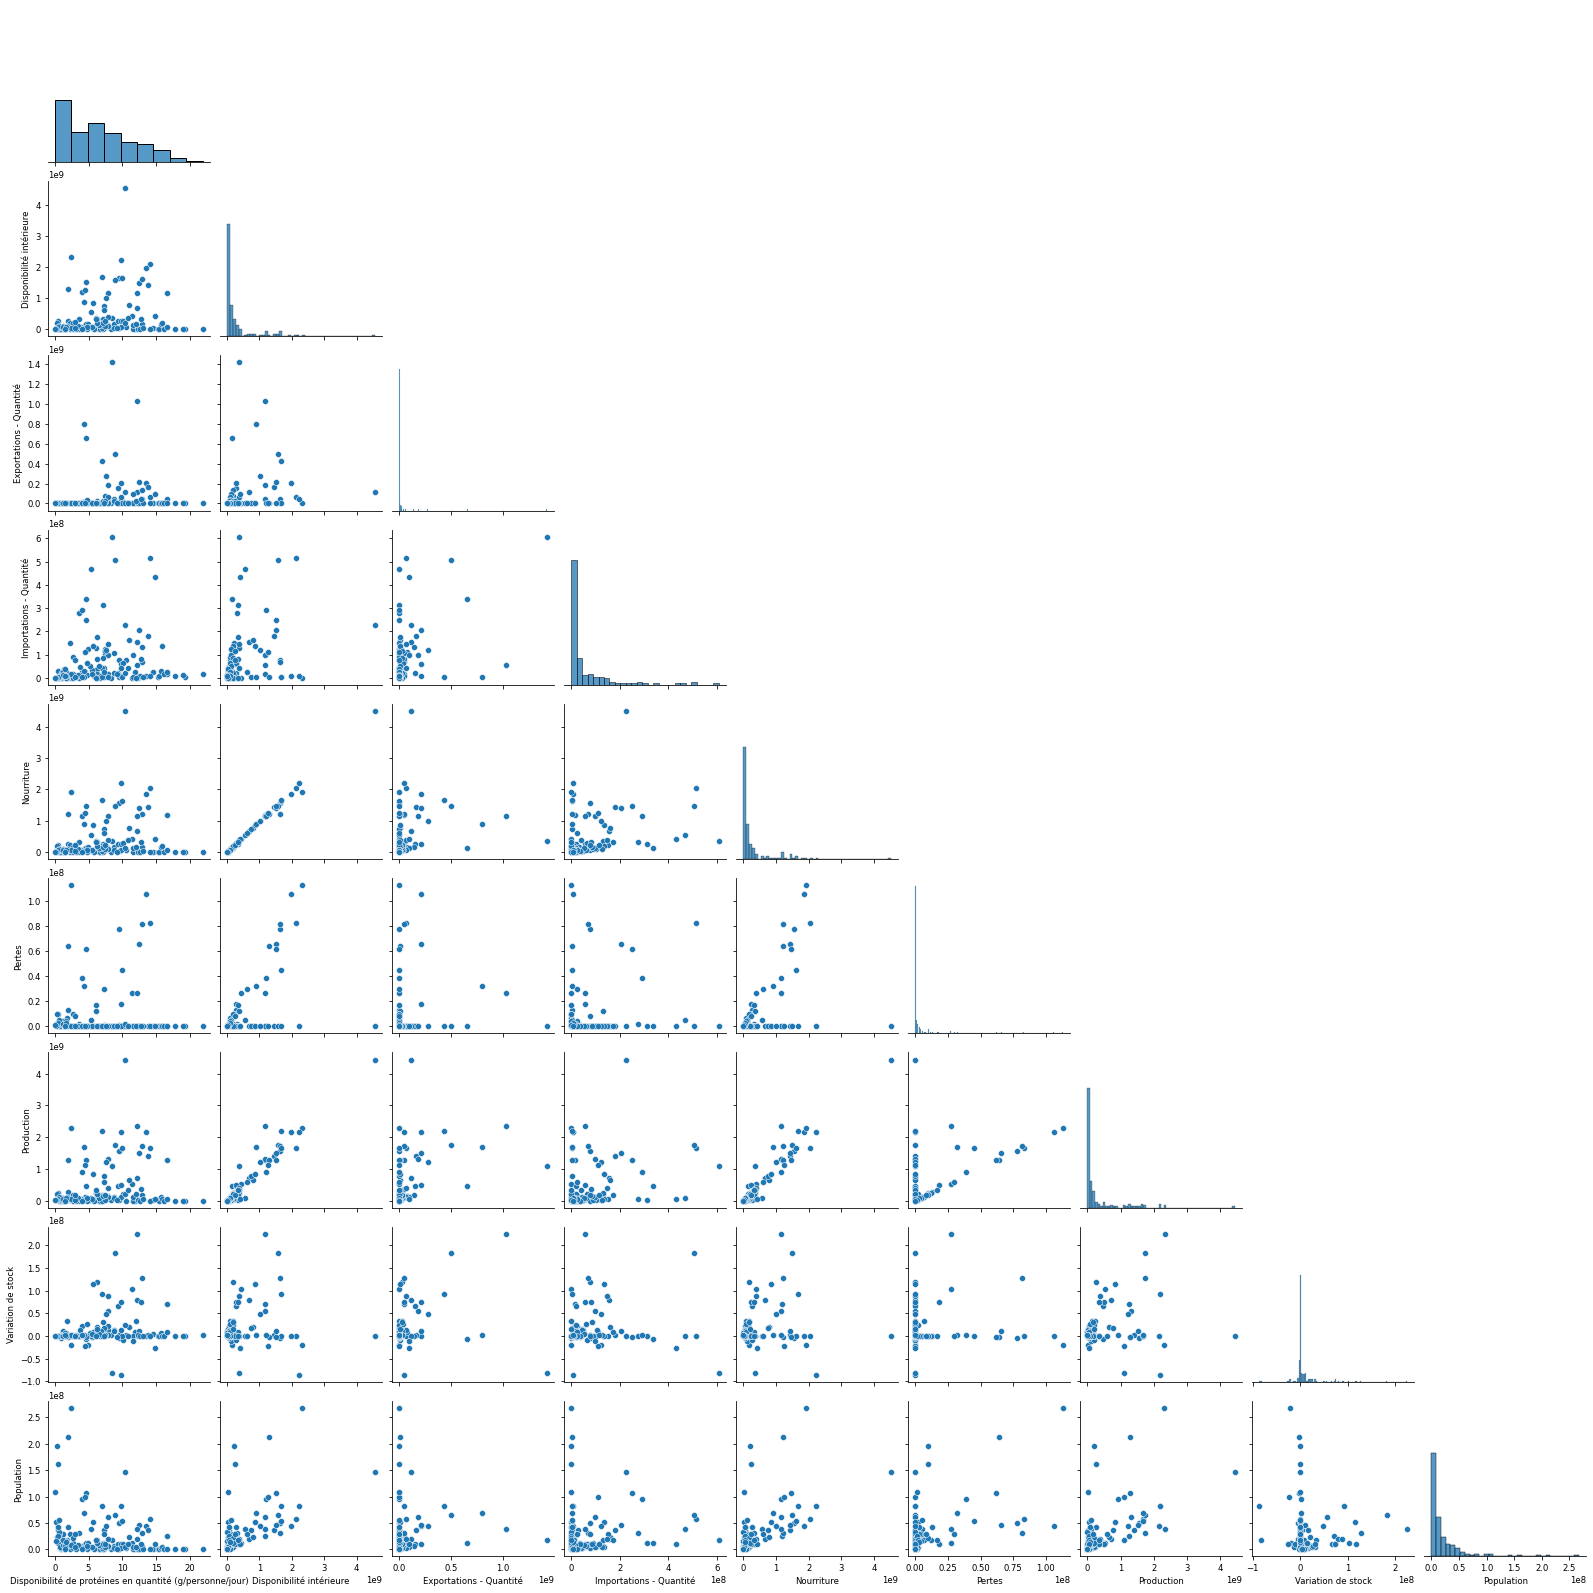

In [86]:
#Exploration des données via les graphiques
plt.rcParams.update({'font.size':8.5})
_ = sns.pairplot(df_zwo_outlier, corner=True)
_ = plt.show()

In [87]:
#Importer la relevante librairie
from scipy.stats import spearmanr

#Créer le tableau de contingence
df_zwo_outlier.corr(method='spearman')

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Variation de stock,Population
Disponibilité de protéines en quantité (g/personne/jour),1.000000,0.266266,0.428114,0.389153,0.261015,-0.288225,0.204030,0.211132,-0.320645
Disponibilité intérieure,0.266266,1.000000,0.597572,0.460076,0.998468,0.363603,0.930969,0.091038,0.739691
Exportations - Quantité,0.428114,0.597572,1.000000,0.513125,0.604432,-0.088630,0.638409,0.323392,0.266999
Importations - Quantité,0.389153,0.460076,0.513125,1.000000,0.462740,-0.191676,0.276554,0.170384,0.106283
Nourriture,0.261015,0.998468,0.604432,0.462740,1.000000,0.357036,0.932285,0.092516,0.743324
Pertes,-0.288225,0.363603,-0.088630,-0.191676,0.357036,1.000000,0.402444,-0.201544,0.600451
Production,0.204030,0.930969,0.638409,0.276554,0.932285,0.402444,1.000000,0.162318,0.736002
Variation de stock,0.211132,0.091038,0.323392,0.170384,0.092516,-0.201544,0.162318,1.000000,-0.104214
Population,-0.320645,0.739691,0.266999,0.106283,0.743324,0.600451,0.736002,-0.104214,1.000000


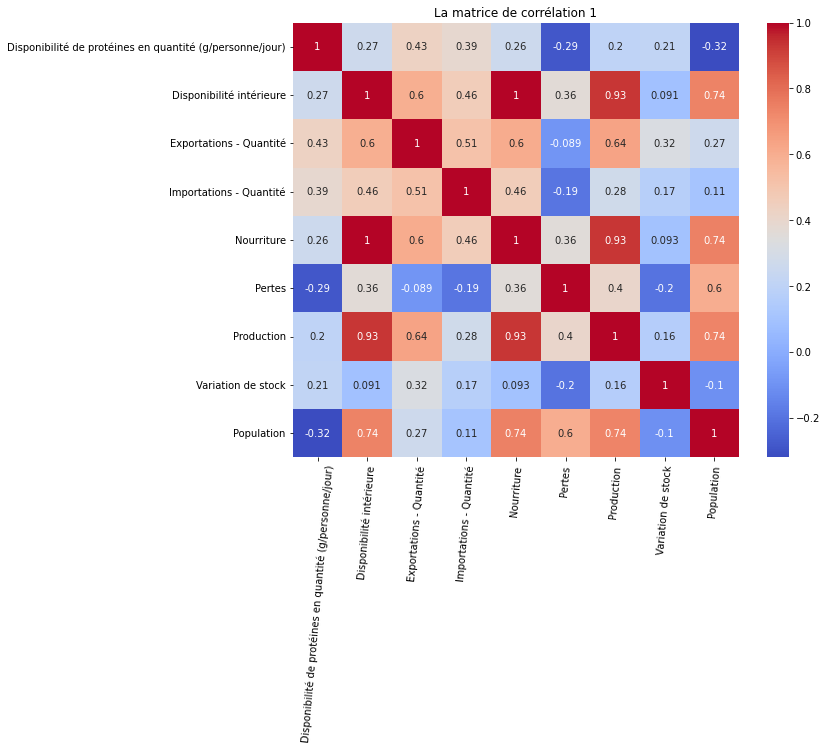

In [88]:
#Plotter la matrice de corrélation
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(10,8))
corr=df_zwo_outlier.corr(method='spearman')
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.xticks(rotation=85)
plt.title("La matrice de corrélation 1")
plt.savefig("La matrice de corrélation")
plt.show()

In [89]:
#Coefficient de corrélation linéaire entre des variables 'production' et 'Disponibilité intérieure', r prends des valeurs entre -1 et 1. 
#Le signe du coefficient indicate le sens de la relation
r=stats.spearmanr(df_no_outlier['Production'],df_no_outlier['Disponibilité intérieure'])
print(r)

SpearmanrResult(correlation=0.9309691956666319, pvalue=1.3557487737341e-70)


In [90]:
print('r=%.3f, p=%.3f' %(r))

r=0.931, p=0.000


In [91]:
#Coefficient de corrélation linéaire entre 'Exportations - Quantité' et 'Importations - Quantité', r prends des valeurs entre -1 et 1. 
#Le signe du coefficient indicate le sens de la relation
r=stats.spearmanr(df_no_outlier['Exportations - Quantité'],df_no_outlier['Importations - Quantité'])
print(r)

SpearmanrResult(correlation=0.5131250373987588, pvalue=4.657807603431413e-12)


In [92]:
print('r=%.3f, p=%.3f' %(r))

r=0.513, p=0.000


In [93]:
#Chercher des colonnes trop corrélées
def correlation (dataset, threshold):
    col_corr = set() #colonnes corrélées
    corr_matrix = df_zwo_outlier.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #absolute valeurs de coefficient
                colname=corr_matrix.columns[i] #noms de colonnes
                col_corr.add(colname)
    return col_corr

In [94]:
#Chercher des colonnes corrélées à partir de 0.8
corr_features =correlation(df_zwo_outlier,0.8)
len(set(corr_features))

2

In [95]:
#Les deux colonnes trouvées
corr_features

{'Nourriture', 'Production'}

In [96]:
#Enlever des colonnes 'Nourriture' et 'Production'
df_zwo_volaille=df_zwo_outlier.drop(corr_features,axis=1)
df_zwo_volaille

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Pertes,Variation de stock,Population
0,Afghanistan,0.54,5.700000e+07,0.0,29000000.0,2000000.0,0.0,37171921.0
1,Afrique du Sud,14.11,2.118000e+09,63000000.0,514000000.0,83000000.0,0.0,57792518.0
2,Albanie,6.26,4.700000e+07,0.0,38000000.0,0.0,4000000.0,2882740.0
3,Algérie,1.97,2.770000e+08,0.0,2000000.0,13000000.0,0.0,42228408.0
4,Angola,3.60,3.190000e+08,0.0,277000000.0,2000000.0,0.0,30809787.0
...,...,...,...,...,...,...,...,...
154,Égypte,4.51,1.250000e+09,1000000.0,110000000.0,0.0,-23000000.0,98423598.0
155,Émirats arabes unis,14.80,4.120000e+08,94000000.0,433000000.0,0.0,-26000000.0,9630959.0
156,Équateur,6.15,3.410000e+08,0.0,0.0,17000000.0,-1000000.0,17084358.0
157,Éthiopie,0.04,1.400000e+07,0.0,1000000.0,1000000.0,0.0,109224414.0


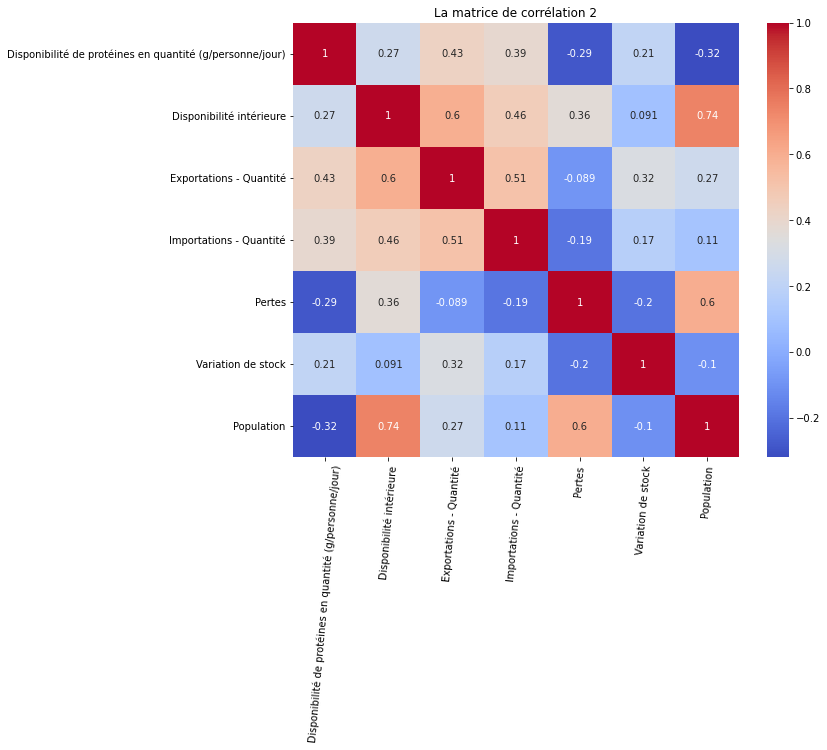

In [97]:
#Faire la deuxième corrélation avec des colonnes qui restent
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(10,8))
corr = df_zwo_volaille.corr(method='spearman')
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.xticks(rotation=85)
plt.title("La matrice de corrélation 2")
plt.show()

### Exporter des données en CSV

In [98]:
#Mettre des données en csv
df_zwo_volaille.to_csv('df_zwo_volaille.csv')